## Using SHAP for interpretability

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dotenv import load_dotenv
import os
import numpy as np


from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

import xgboost as xgb
from ngboost import NGBClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

In [5]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

In [7]:
imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0,
)

imputer_missForest.fit(X_train)
X_train_t = imputer_missForest.transform(X_train)
X_test_t = imputer_missForest.transform(X_test)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [22]:
with open("rf_model.pkl", "rb") as file:
    loaded_model_rf = pickle.load(file)

print(f"{loaded_model_rf} model loaded successfully!")

loaded_model_xgb = xgb.Booster()
loaded_model_xgb.load_model("xgboost_model.json") 

print(f"{loaded_model_xgb} model loaded successfully!")

with open("ngboost_model.pkl", "rb") as file:
    loaded_model_ngb = pickle.load(file)

print(f"{loaded_model_ngb} model loaded successfully!")

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       min_samples_leaf=0.06894623366824346,
                       min_samples_split=0.04074104956371625, n_estimators=361,
                       random_state=42) model loaded successfully!
<xgboost.core.Booster object at 0x000002209ACA8BC0> model loaded successfully!
NGBClassifier(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                                         random_state=42),
              learning_rate=0.09814797466514788, n_estimators=496,
              random_state=RandomState(MT19937) at 0x2209B533940) model loaded successfully!


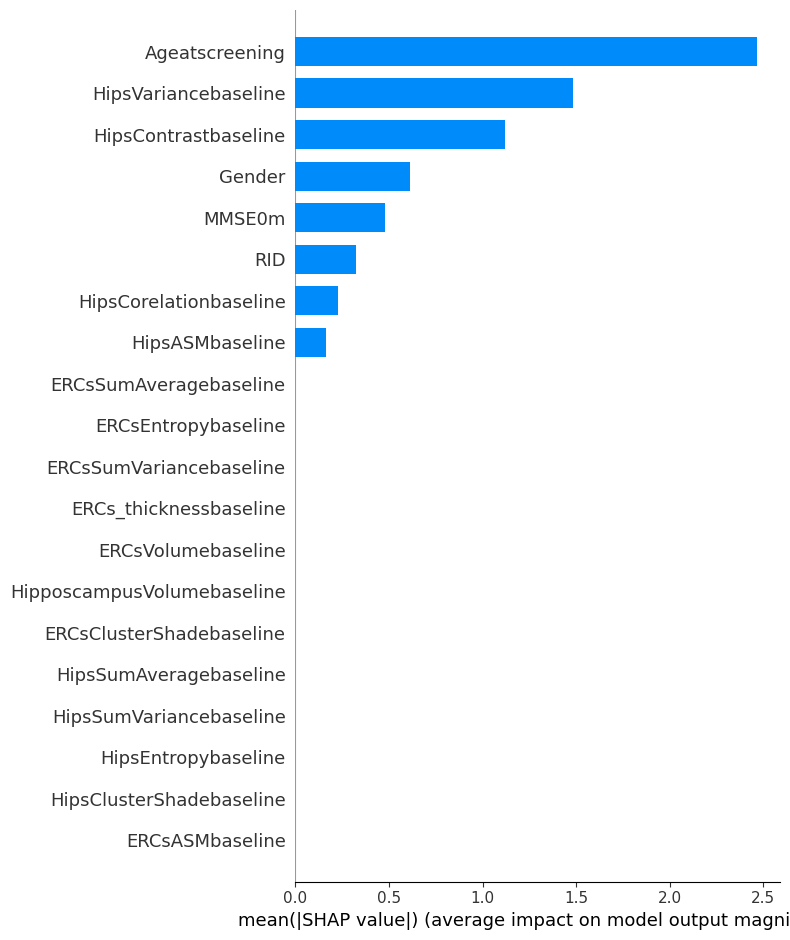

In [ ]:
import shap
shap.initjs 

# Assuming X_test_t is your test data
X_test_t = pd.DataFrame(X_test_t, columns=X_train.columns)

## SHAP plot for loc trees
explainer = shap.TreeExplainer(loaded_model_ngb, model_output=0) 
shap_values = explainer.shap_values(X_test_t)

# Bar plot for feature importance
shap.summary_plot(shap_values, X_test_t, plot_type="bar", feature_names=X_test_t.columns)


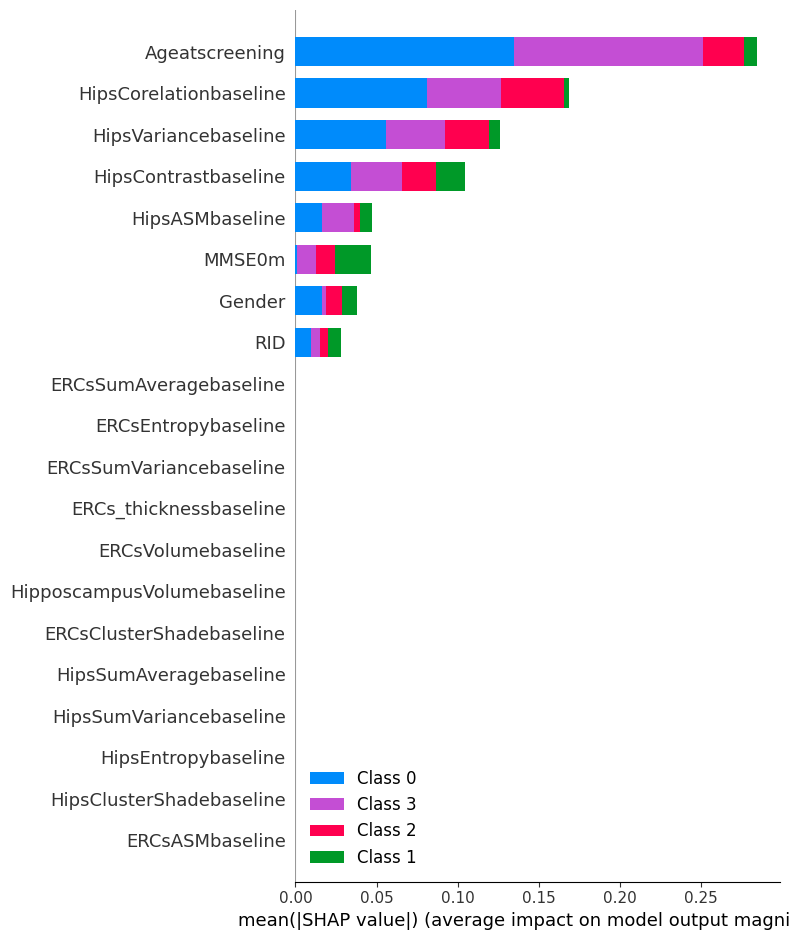

In [64]:
import shap
shap.initjs 

# Assuming X_test_t is your test data
X_test_t = pd.DataFrame(X_test_t, columns=X_train.columns)

## SHAP plot for loc trees
explainer = shap.Explainer(loaded_model_rf) 
shap_values = explainer.shap_values(X_test_t)

# Bar plot for feature importance
shap.summary_plot(shap_values, X_test_t, plot_type="bar", feature_names=X_test_t.columns)


In [52]:

shap.plots.waterfall(shap_values[0, :, 2], max_display=23)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [16]:
shap.plots.bar(shap_values, max_display=23)

IndexError: list index out of range

In [ ]:
shap.plots.beeswarm(shap_values, max_display=23)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!